# Problem Statement
We're going to classify spam versus non spam SMS.There's an attempt to make our own spam detector

# 1)- Importing key Modules

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
import warnings
warnings.filterwarnings('ignore')

In [2]:
import nltk
import pandas as pd
import numpy as np
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# 2)-Loading data

In [3]:
dataset=pd.read_csv('SMSSpamCollection.csv',delimiter='\t', quoting=3)

In [4]:
dataset.head()

,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
0,ham,Ok lar... Joking wif u oni...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,U dun say so early hor... U c already then say...
3,ham,"Nah I don't think he goes to usf, he lives aro..."
4,spam,FreeMsg Hey there darling it's been 3 week's n...


As data points are jumping over index space, we need to resolve this issue.

In [5]:
dataset=pd.read_csv('SMSSpamCollection.csv',delimiter='\t', quoting=3,names=['label','sms'])
dataset.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
dataset.shape

(5574, 2)

### Alternative way

In [7]:
raw_data=open('SMSSpamCollection.csv').read()

In [8]:
raw_data[:300]

"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\nham\tOk lar... Joking wif u oni...\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 084528100"

In [9]:
parsed_data= raw_data.replace('\t', '\n').split('\n')

In [10]:
parsed_data[:10]

['ham',
 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham',
 'Ok lar... Joking wif u oni...',
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham',
 'U dun say so early hor... U c already then say...',
 'ham',
 "Nah I don't think he goes to usf, he lives around here though"]

In [11]:
# Splitting into two lists: One for spam/ham and other for sms messeges

label_list=parsed_data[0::2]
label_list[:6]

['ham', 'ham', 'spam', 'ham', 'ham', 'spam']

In [12]:
msg_list=parsed_data[1::2]
msg_list[:6]

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv"]

In [13]:
# combine these two list for analysis
combined_df=pd.DataFrame({ # providing a dictionary 
    'label': label_list,
    'sms': msg_list 
})

ValueError: arrays must all be same length

In [ ]:
len(label_list)

In [ ]:
len(msg_list)

In [ ]:
print(label_list[-3:])

In [ ]:
combined_df=pd.DataFrame({ # providing a dictionary 
    'label': label_list[:-1], # skip last row from list
    'sms': msg_list 
})

In [ ]:
combined_df.shape

In [ ]:
combined_df.head()

In [ ]:
type(combined_df)

# 3)- Exploring dataset

In [ ]:
combined_df.columns

### a. checking datatype

In [ ]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(combined_df)
table_dtype

### b. Exploring label feature

In [ ]:
print(f'Input data has {(len(combined_df))} rows, {(len(combined_df.columns))} columns')

In [ ]:
print(f'ham={len(combined_df[combined_df["label"]=="ham"])}')

In [ ]:
print(f'spam={len(combined_df[combined_df["label"]=="spam"])}')

In [ ]:
combined_df.label.value_counts()

In [ ]:
combined_df.label.value_counts(normalize=True)

In [ ]:
combined_df.label.value_counts().plot(kind='bar')

In [ ]:
# use sns for fun
sns.countplot(x='label',data=combined_df, palette='hls')
plt.show();
combined_df['label'].value_counts()

In [ ]:
# let's see how spam data looks like
combined_df[combined_df["label"]=="spam"].head(10)

In [ ]:
combined_df[combined_df["label"]=="ham"].head(10)

### c. Checking sms feature

In [ ]:
length_sms = combined_df['sms'].str.len()
length_sms[0:10]

In [ ]:
plt.hist(length_sms, bins=20, label="length of sms text")  
plt.legend() 
plt.show()

### d. Missing values

In [ ]:
print(f'No. of missing values= {combined_df.isnull()}')

In [ ]:
print(f'No. of missing values= {combined_df.isnull().sum()}')

In [ ]:
print(f'No. of missing values in label= {combined_df.label.isnull().sum()}')

In [ ]:
print(f'No. of missing values in sms= {combined_df.sms.isnull().sum()}')

In [ ]:
# make a function

# Checking rows now
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

In [ ]:
summary_missing(combined_df)

### e. duplicate values

In [ ]:
combined_df.duplicated().sum()

In [ ]:
combined_df.label.duplicated().sum()

In [ ]:
combined_df.sms.duplicated().sum()

# 4)- Basic feature extraction

- Number of words
- Number of characters
- Average word length
- Number of stopwords
- Number of special characters
- Number of numerics
- Number of uppercase words

In [ ]:
data_df=combined_df

### 4.1)- Number of words

In [ ]:
data_df['word_count'] = data_df['sms'].apply(lambda x: len(str(x).split(" ")))
data_df[['sms','word_count']].head()

### 4.2)-Number of characters

In [ ]:
# this also includes spaces
data_df['char_count'] = data_df['sms'].str.len() 
data_df[['sms','char_count']].head()

In [ ]:
length_df = data_df['sms'].str.len() 
plt.hist(length_df, bins=20, label="char count for sms texts") 
plt.legend() 
plt.show()

It is skewed. Let's see avarage word length



### 4.3)- Average Word Length

In [ ]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

data_df['avg_word'] = data_df['sms'].apply(lambda x: avg_word(x))
data_df[['sms','avg_word']].head()

### 4.4)-Number of stopwords

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

data_df['stopwords'] = data_df['sms'].apply(lambda x: len([x for x in x.split() if x in stop]))
data_df[['sms','stopwords']].head()

### 4.5)-Number of special characters

In [ ]:
# use hashtag as special word as it means some reference. We may add more special characters like *,-,.,"", if needed to explore
data_df['special-words'] = data_df['sms'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
data_df[['sms','special-words']].head()

### 4.6)-Number of numerics/digits

In [ ]:
data_df['numerics'] = data_df['sms'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data_df[['sms','numerics']].head()

### 3.7)- Number of Uppercase words

In [ ]:
data_df['upper'] = data_df['sms'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data_df[['sms','upper']].head()

# 5)-NLP Pipeline

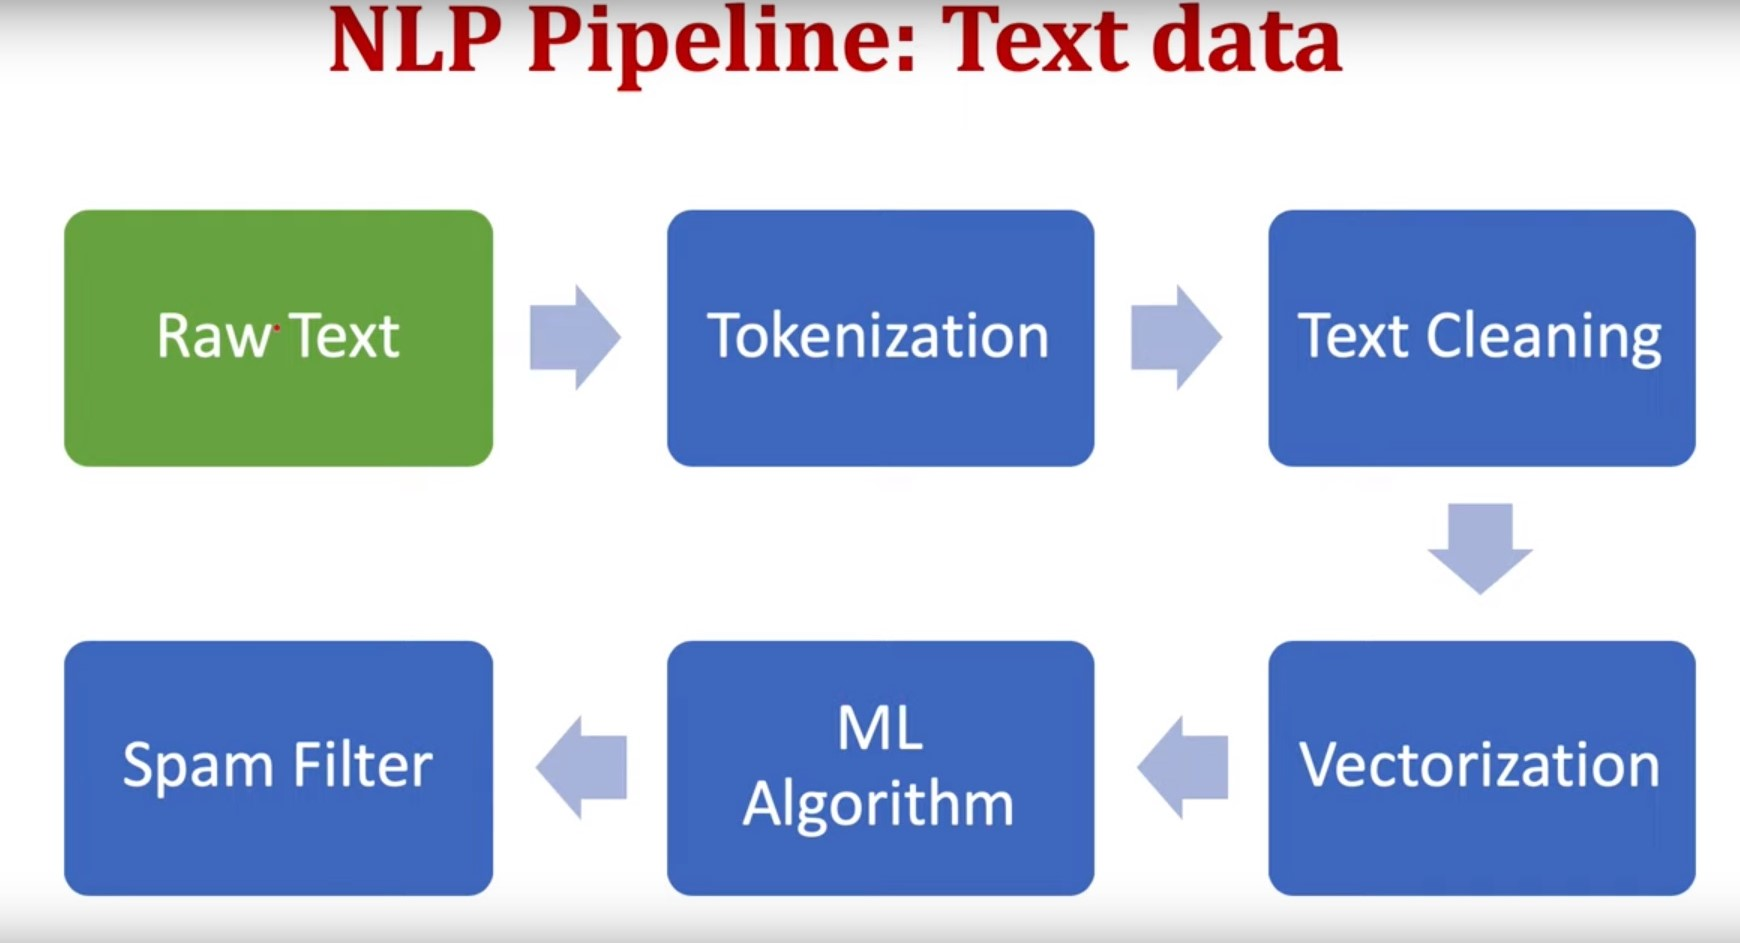

In [14]:
from IPython.display import Image
Image(filename='pipeline.jpg')

In [ ]:
sample=combined_df.sms[1]

In [ ]:
sample

### Vectorization

- word2vec
- bag of words
- TFIDF
- 